In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [91]:
df = pd.read_csv('forest_fire.csv')
df.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Reason
0,1,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,NaN
1,2,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,NaN
2,3,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,NaN
3,4,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,NaN
4,5,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,NaN


In [92]:
df.shape

(247, 16)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        247 non-null    int64  
 1   day          246 non-null    object 
 2   month        245 non-null    object 
 3   year         242 non-null    object 
 4   Temperature  245 non-null    object 
 5    RH          245 non-null    object 
 6    Ws          245 non-null    object 
 7   Rain         245 non-null    object 
 8   FFMC         245 non-null    object 
 9   DMC          245 non-null    object 
 10  DC           245 non-null    object 
 11  ISI          245 non-null    object 
 12  BUI          245 non-null    object 
 13  FWI          245 non-null    object 
 14  Classes      245 non-null    object 
 15  Reason       0 non-null      float64
dtypes: float64(1), int64(1), object(14)
memory usage: 31.0+ KB


In [94]:
df.describe()

,index,Reason
count,247.00000,0.0
mean,124.00000,NaN
std,71.44695,NaN
min,1.00000,NaN
25%,62.50000,NaN
50%,124.00000,NaN
75%,185.50000,NaN
max,247.00000,NaN


In [95]:
df.dtypes

index            int64
day             object
month           object
year            object
Temperature     object
 RH             object
 Ws             object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes         object
Reason         float64
dtype: object

In [96]:
df.duplicated().sum()

np.int64(0)

In [97]:
df.isnull().sum()

index            0
day              1
month            2
year             5
Temperature      2
 RH              2
 Ws              2
Rain             2
FFMC             2
DMC              2
DC               2
ISI              2
BUI              2
FWI              2
Classes          2
Reason         247
dtype: int64

In [98]:
df =df.drop(['Reason'],axis=1)


In [99]:
df.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [100]:
df1 = df.iloc[0:122]  
df2 = df.iloc[125:248]  

df2.head(2) , df1.head(2)


(     index day month  year Temperature  RH  Ws Rain   FFMC  DMC   DC  ISI  \
 125    126   1     6  2012        89.6  71  12   0.7  57.1  2.5  8.2  0.6   
 126    127   2     6  2012          86  73  13     4  55.7  2.7  7.8  0.6   
 
      BUI  FWI    Classes    
 125  2.8  0.2  not fire     
 126  2.9  0.2  not fire     ,
    index day month  year Temperature  RH  Ws Rain   FFMC  DMC   DC  ISI  BUI  \
 0      1   1     6  2012          29  57  18     0  65.7  3.4  7.6  1.3  3.4   
 1      2   2     6  2012          29  61  13   1.3  64.4  4.1  7.6    1  3.9   
 
    FWI     Classes    
 0  0.5  not  fire     
 1  0.4   not fire     )

In [101]:
df1.isnull().sum()

index          0
day            0
month          0
year           1
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [102]:
whichindexisnull = df1[df1['year'].isnull()].index
whichindexisnull

Index([12], dtype='int64')

In [103]:
print(df1['year'].unique())

['2012' nan '-']


In [104]:
df1['year'] = df1['year'].apply(lambda x: 2012 if x != 2012 else x)
print(df1['year'].unique())

[2012]


/var/folders/mf/jn4wxcbd2tb79hzk601sjvpw0000gn/T/ipykernel_12700/2744363587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['year'] = df1['year'].apply(lambda x: 2012 if x != 2012 else x)


In [105]:
df2.isnull().sum()

index          0
day            0
month          0
year           2
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [106]:
whatindexisnulll = df2[df2['year'].isnull()].index
whatindexisnulll

Index([128, 153], dtype='int64')

In [107]:
whatindexisnulll = df2[df2['Classes  '].isnull()].index
whatindexisnulll

Index([], dtype='int64')

In [108]:
print(df2['year'].unique())

['2012' nan 'Cf']


In [109]:
df2['year'] = df2['year'].apply(lambda x: 2012 if x != 2012 else x)
print(df2['year'].unique())

[2012]


/var/folders/mf/jn4wxcbd2tb79hzk601sjvpw0000gn/T/ipykernel_12700/3697259221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['year'] = df2['year'].apply(lambda x: 2012 if x != 2012 else x)


In [110]:
print(df1['Classes  '].unique())

['not  fire   ' 'not fire   ' ' not fire   ' 'fire   ' ' fire   ' 'TRUE'
 'fire' 'fire ' 'Fire' 'not fire' 'not fire ']


In [111]:
print(df2['Classes  '].unique())

['not fire   ' 'fire   ' 'Fire' 'not fire     ' 'fire' 'not fire    ']


In [112]:
df1['Temperature'] = df1['Temperature'].astype(str).str.replace('c', '').astype(int)
print(df1['Temperature'])

0      29
1      29
2      26
3      25
4      27
       ..
117    31
118    31
119    32
120    26
121    25
Name: Temperature, Length: 122, dtype: int64


/var/folders/mf/jn4wxcbd2tb79hzk601sjvpw0000gn/T/ipykernel_12700/1931339308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Temperature'] = df1['Temperature'].astype(str).str.replace('c', '').astype(int)


In [113]:
df2['Temperature'] = df2['Temperature'].astype(str).str.replace('F', '').astype(float)
print(df1['Temperature'])

0      29
1      29
2      26
3      25
4      27
       ..
117    31
118    31
119    32
120    26
121    25
Name: Temperature, Length: 122, dtype: int64


/var/folders/mf/jn4wxcbd2tb79hzk601sjvpw0000gn/T/ipykernel_12700/1652974218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Temperature'] = df2['Temperature'].astype(str).str.replace('F', '').astype(float)


In [114]:
df1.columns = df1.columns.str.replace(' ', '')
df2.columns = df2.columns.str.replace(' ', '')
print(df1.columns)


Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')


In [115]:
print(df2.columns)

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')


In [116]:
columns_to_convert = ['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

for df in [df1, df2]:
    df[columns_to_convert] = df[columns_to_convert].replace(' ', '', regex=True)
    df[columns_to_convert] = df[columns_to_convert].replace(',', '.', regex=True)
    df[columns_to_convert] = df[columns_to_convert].astype(float)

print(df2.dtypes)
print(df1.dtypes)


index            int64
day             object
month           object
year             int64
Temperature    float64
RH             float64
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object
index            int64
day             object
month           object
year             int64
Temperature      int64
RH             float64
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object


In [117]:
df1['day'] = df1['day'].astype(int)   
df1['month'] = df1['month'].astype(int)  

df2['day'] = df2['day'].astype(int)  
df2['month'] = df2['month'].astype(int)  

print(df1[['day', 'month']].dtypes) 
print(df2[['day', 'month']].dtypes) 

day      int64
month    int64
dtype: object
day      int64
month    int64
dtype: object


In [118]:
data = {
    'Classes': [
        'not fire', 'fire', 'TRUE', 'Fire', 'not fire', 'fire', 'not fire', 
    ]
}

df1['Classes'] = df1['Classes'].str.strip().str.lower()

df1['Classes'] = df1['Classes'].apply(lambda x: 1 if x == 'fire' or x == 'true' else 0)



In [119]:
print(df1['Classes'].unique())

[0 1]


In [120]:
data = {
    'Classes': [
        'not fire', 'fire', 'TRUE', 'Fire', 'not fire', 'fire', 'not fire', 
    ]
}

df2['Classes'] = df2['Classes'].str.strip().str.lower()

df2['Classes'] = df2['Classes'].apply(lambda x: 1 if x == 'fire' or x == 'true' else 0)

In [121]:
print(df2['Classes'].unique())

[0 1]


In [122]:
df1['Classes'] = df1['Classes'].astype(int)   
df2['Classes'] = df2['Classes'].astype(int)  

print(df1['Classes'].dtypes) 
print(df2['Classes'].dtypes) 

int64
int64


In [123]:
df2.dtypes
#df1.dtypes

index            int64
day              int64
month            int64
year             int64
Temperature    float64
RH             float64
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
dtype: object

In [124]:
invalid_temp = df1[(df1['Temperature'] < 22) | (df1['Temperature'] > 42)]
print(invalid_temp)

Empty DataFrame
Columns: [index, day, month, year, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes]
Index: []


In [125]:
invalid_temp = df2[(df2['Temperature'] < 70) | (df2['Temperature'] > 110)]
print(invalid_temp)

Empty DataFrame
Columns: [index, day, month, year, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes]
Index: []


In [126]:
invalid_temp = df1[(df1['DMC'] < 1.1) | (df1['DMC'] > 65.9)]
print(invalid_temp)

     index  day  month  year  Temperature    RH    Ws  Rain  FFMC  DMC   DC  \
93      94    2      9  2012           22  86.0  15.0  10.1  30.5  0.7  7.0   
106    107   15      9  2012           24  82.0  15.0   0.4  44.9  0.9  7.3   

     ISI  BUI  FWI  Classes  
93   0.0  1.1  0.0        0  
106  0.2  1.4  0.0        0  


In [127]:
invalid_temp = df1[(df1['DC'] < 7) | (df1['DC'] > 220.4)]
print(invalid_temp)

   index  day  month  year  Temperature    RH    Ws  Rain  FFMC  DMC   DC  \
3      4    4      6  2012           25  89.0  13.0   2.5  28.6  1.3  6.9   

   ISI  BUI  FWI  Classes  
3  0.0  1.7  0.0        0  


In [128]:
invalid_temp = df2[(df2['ISI'] < 0) | (df2['ISI'] > 18.5)]
print(invalid_temp)

     index  day  month  year  Temperature    RH    Ws  Rain  FFMC   DMC    DC  \
190    191    5      8  2012         93.2  42.0  17.0   0.1  88.3  23.6  52.5   

      ISI   BUI   FWI  Classes  
190  19.0  23.5  12.6        1  


In [129]:
invalid_temp = df2[(df2['DMC'] < 1.1) | (df2['DMC'] > 65.9)]
print(invalid_temp)

     index  day  month  year  Temperature    RH    Ws  Rain  FFMC  DMC   DC  \
217    218    1      9  2012         84.2  86.0  16.0   0.0  37.9  0.9  8.2   

     ISI  BUI  FWI  Classes  
217  0.1  1.4  0.0        0  


In [130]:
invalid_temp = df2[(df2['FFMC'] < 28.6) | (df2['FFMC'] > 92.5)]
print(invalid_temp)

     index  day  month  year  Temperature    RH    Ws  Rain  FFMC   DMC    DC  \
175    176   21      7  2012         96.8  29.0  18.0   0.0  93.9  39.6  80.6   
187    188    2      8  2012        104.0  34.0  14.0   0.0  93.3  10.8  21.4   
188    189    3      8  2012        102.2  33.0  17.0   0.0  93.7  17.1  32.1   
189    190    4      8  2012        100.4  35.0  15.0   0.0  93.8  23.0  42.7   
196    197   11      8  2012        104.0  31.0  15.0   0.0  94.2  22.5  46.3   
197    198   12      8  2012        102.2  21.0  17.0   0.4  93.0  18.4  41.5   
202    203   17      8  2012        107.6  24.0   9.0   0.0  96.0  30.3  76.4   
203    204   18      8  2012         98.6  37.0  14.0   0.0  94.3  35.9  86.8   
232    233   16      9  2012         91.4  26.0  13.0   0.0  93.9  21.2  59.2   

      ISI   BUI   FWI  Classes  
175  18.5  39.5  30.0        1  
187  13.8  10.6  13.5        1  
188  17.2  16.9  19.5        1  
189  15.7  22.9  20.9        1  
196  16.6  22.4  21.6   

In [131]:
mean_ffmc = df2['FFMC'][(df2['FFMC'] >= 28.6) & (df2['FFMC'] <= 92.5)].mean()

df2['FFMC'] = df2['FFMC'].where((df2['FFMC'] >= 28.6) & (df2['FFMC'] <= 92.5), mean_ffmc)

In [132]:
mean_dmc = df1['DMC'][(df1['DMC'] >= 1.1) & (df1['DMC'] <= 65.9)].mean()

df1['DMC'] = df1['DMC'].where((df1['DMC'] >= 1.1) & (df1['DMC'] <= 65.9), mean_dmc)

In [133]:
mean_dc = df1['DC'][(df1['DC'] >= 7) & (df1['DC'] <= 220.4)].mean()

df1['DC'] = df1['DC'].where((df1['DC'] >= 7) & (df1['DC'] <= 220.4), mean_dc)

In [134]:
mean_isi = df2['ISI'][(df2['ISI'] >= 0) & (df2['ISI'] <= 18.5)].mean()

df2['ISI'] = df2['ISI'].where((df2['ISI'] >= 0) & (df2['ISI'] <= 18.5), mean_isi)

In [135]:
mean_dmc = df2['DMC'][(df2['DMC'] >= 1.1) & (df2['DMC'] <= 65.9)].mean()

df2['DMC'] = df2['DMC'].where((df2['DMC'] >= 1.1) & (df2['DMC'] <= 65.9), mean_dmc)

In [136]:
outliers = df1[(df1['FWI'] < df1['FWI'].quantile(0.01)) | (df1['FWI'] > df1['FWI'].quantile(0.99))]
print(outliers)


    index  day  month  year  Temperature    RH    Ws  Rain  FFMC   DMC     DC  \
83     84   23      8  2012           36  53.0  16.0   0.0  89.5  37.6  161.5   
89     90   29      8  2012           35  48.0  18.0   0.0  90.1  54.2  220.4   

     ISI   BUI   FWI  Classes  
83  10.4  47.5  22.3        1  
89  12.5  67.4  30.2        1  


In [137]:
outliers = df2[(df2['FWI'] < df2['FWI'].quantile(0.01)) | (df2['FWI'] > df2['FWI'].quantile(0.99))]
print(outliers)


     index  day  month  year  Temperature    RH    Ws  Rain  FFMC   DMC  \
210    211   25      8  2012         93.2  40.0  18.0   0.0  92.1  56.3   
211    212   26      8  2012         91.4  37.0  16.0   0.0  92.2  61.3   

        DC   ISI   BUI   FWI  Classes  
210  157.5  14.3  59.5  31.1        1  
211  167.2  13.1  64.0  30.3        1  


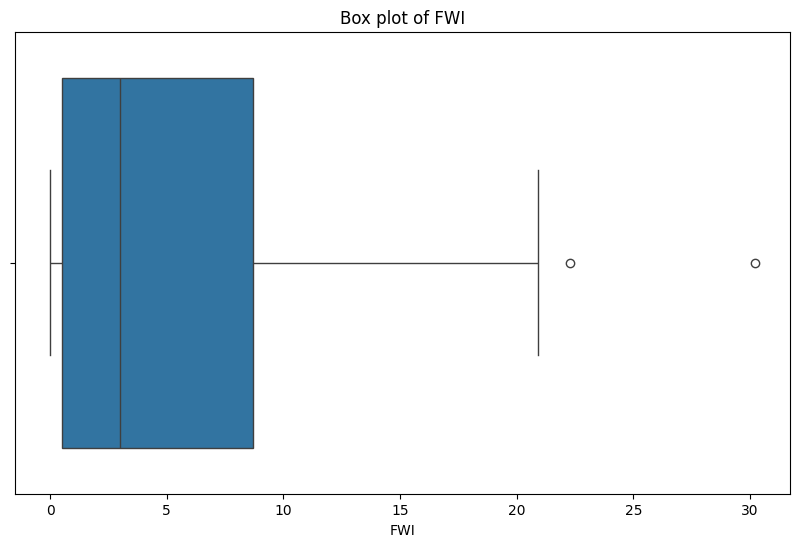

In [138]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['FWI'])
plt.title('Box plot of FWI')
plt.xlabel('FWI')
plt.show()


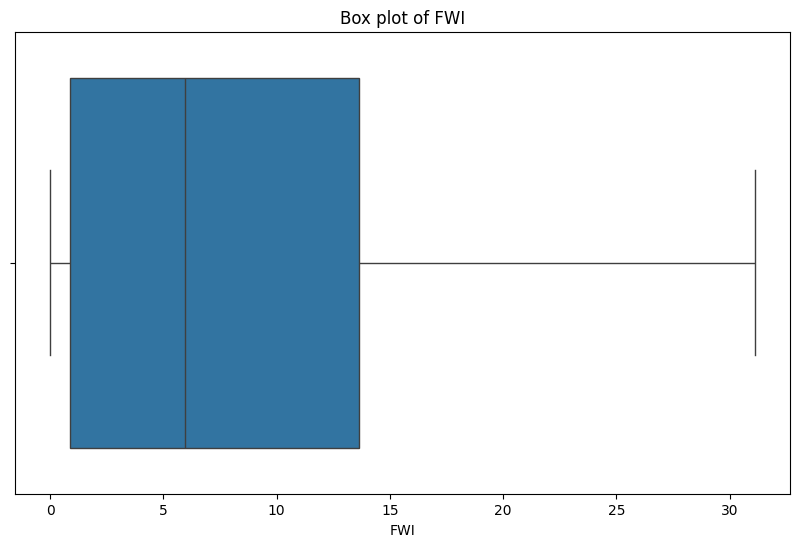

In [139]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df2['FWI'])
plt.title('Box plot of FWI')
plt.xlabel('FWI')
plt.show()

In [140]:
mean_fwi = df1['FWI'].mean()
df1['FWI'] = df1['FWI'].where((df1['FWI'] >= df1['FWI'].quantile(0.01)) & (df1['FWI'] <= df1['FWI'].quantile(0.99)), mean_fwi)


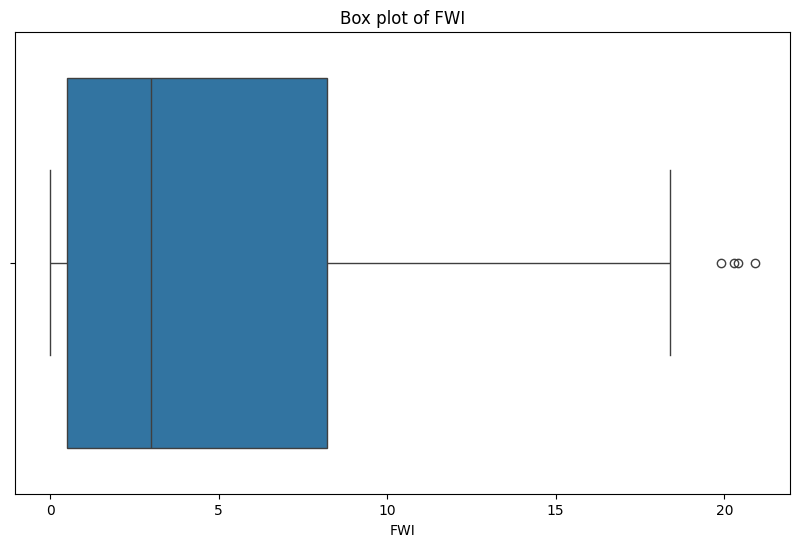

In [141]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['FWI'])
plt.title('Box plot of FWI')
plt.xlabel('FWI')
plt.show()

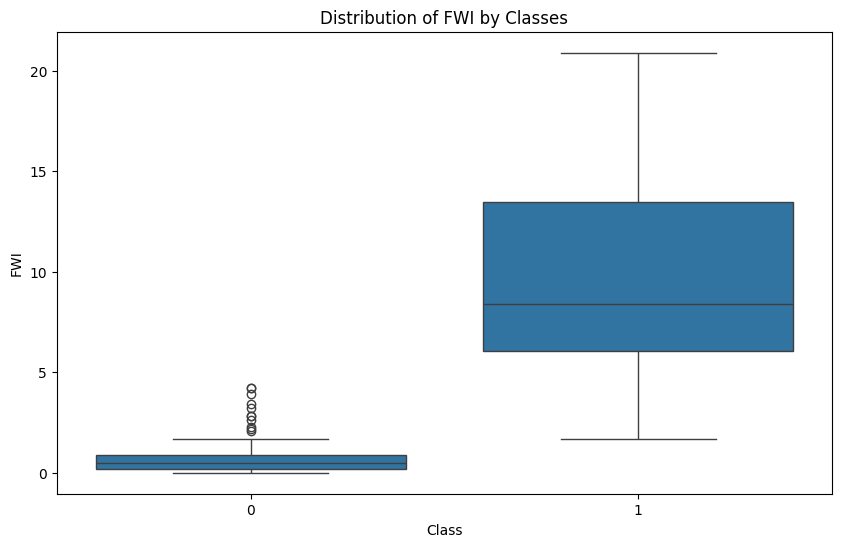

In [142]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Classes', y='FWI', data=df1)
plt.title('Distribution of FWI by Classes')
plt.xlabel('Class')
plt.ylabel('FWI')
plt.show()


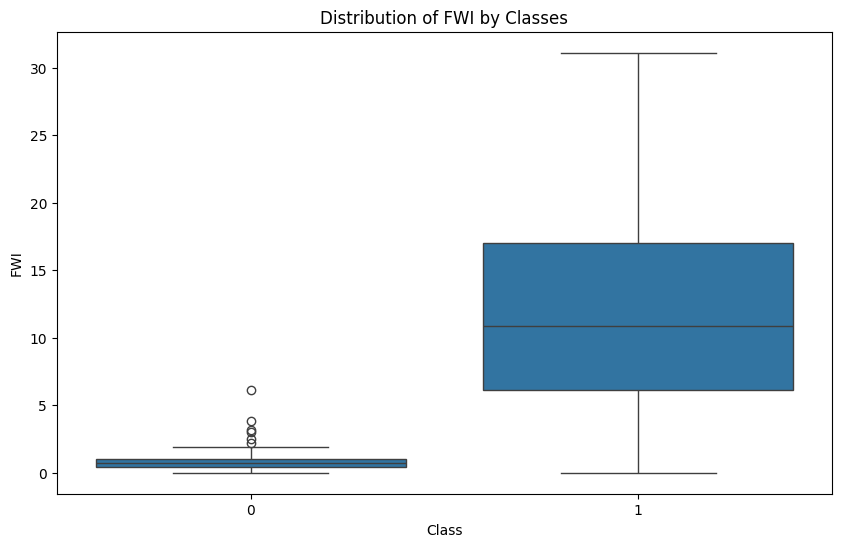

In [143]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Classes', y='FWI', data=df2)
plt.title('Distribution of FWI by Classes')
plt.xlabel('Class')
plt.ylabel('FWI')
plt.show()


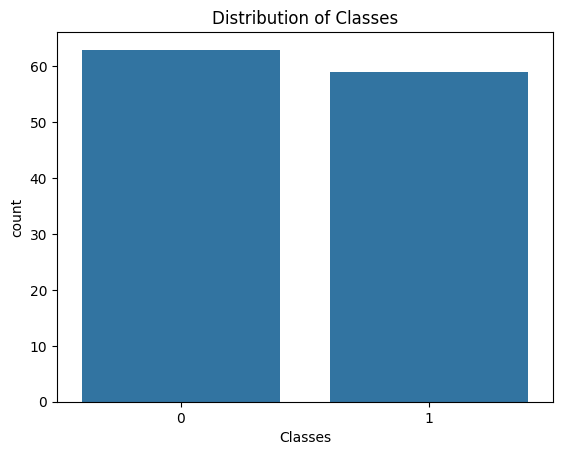

In [144]:
sns.countplot(x='Classes', data=df1)
plt.title('Distribution of Classes')
plt.show()

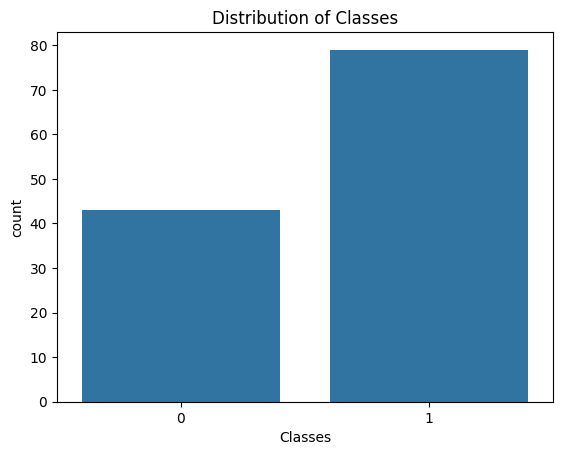

In [145]:
sns.countplot(x='Classes', data=df2)
plt.title('Distribution of Classes')
plt.show()

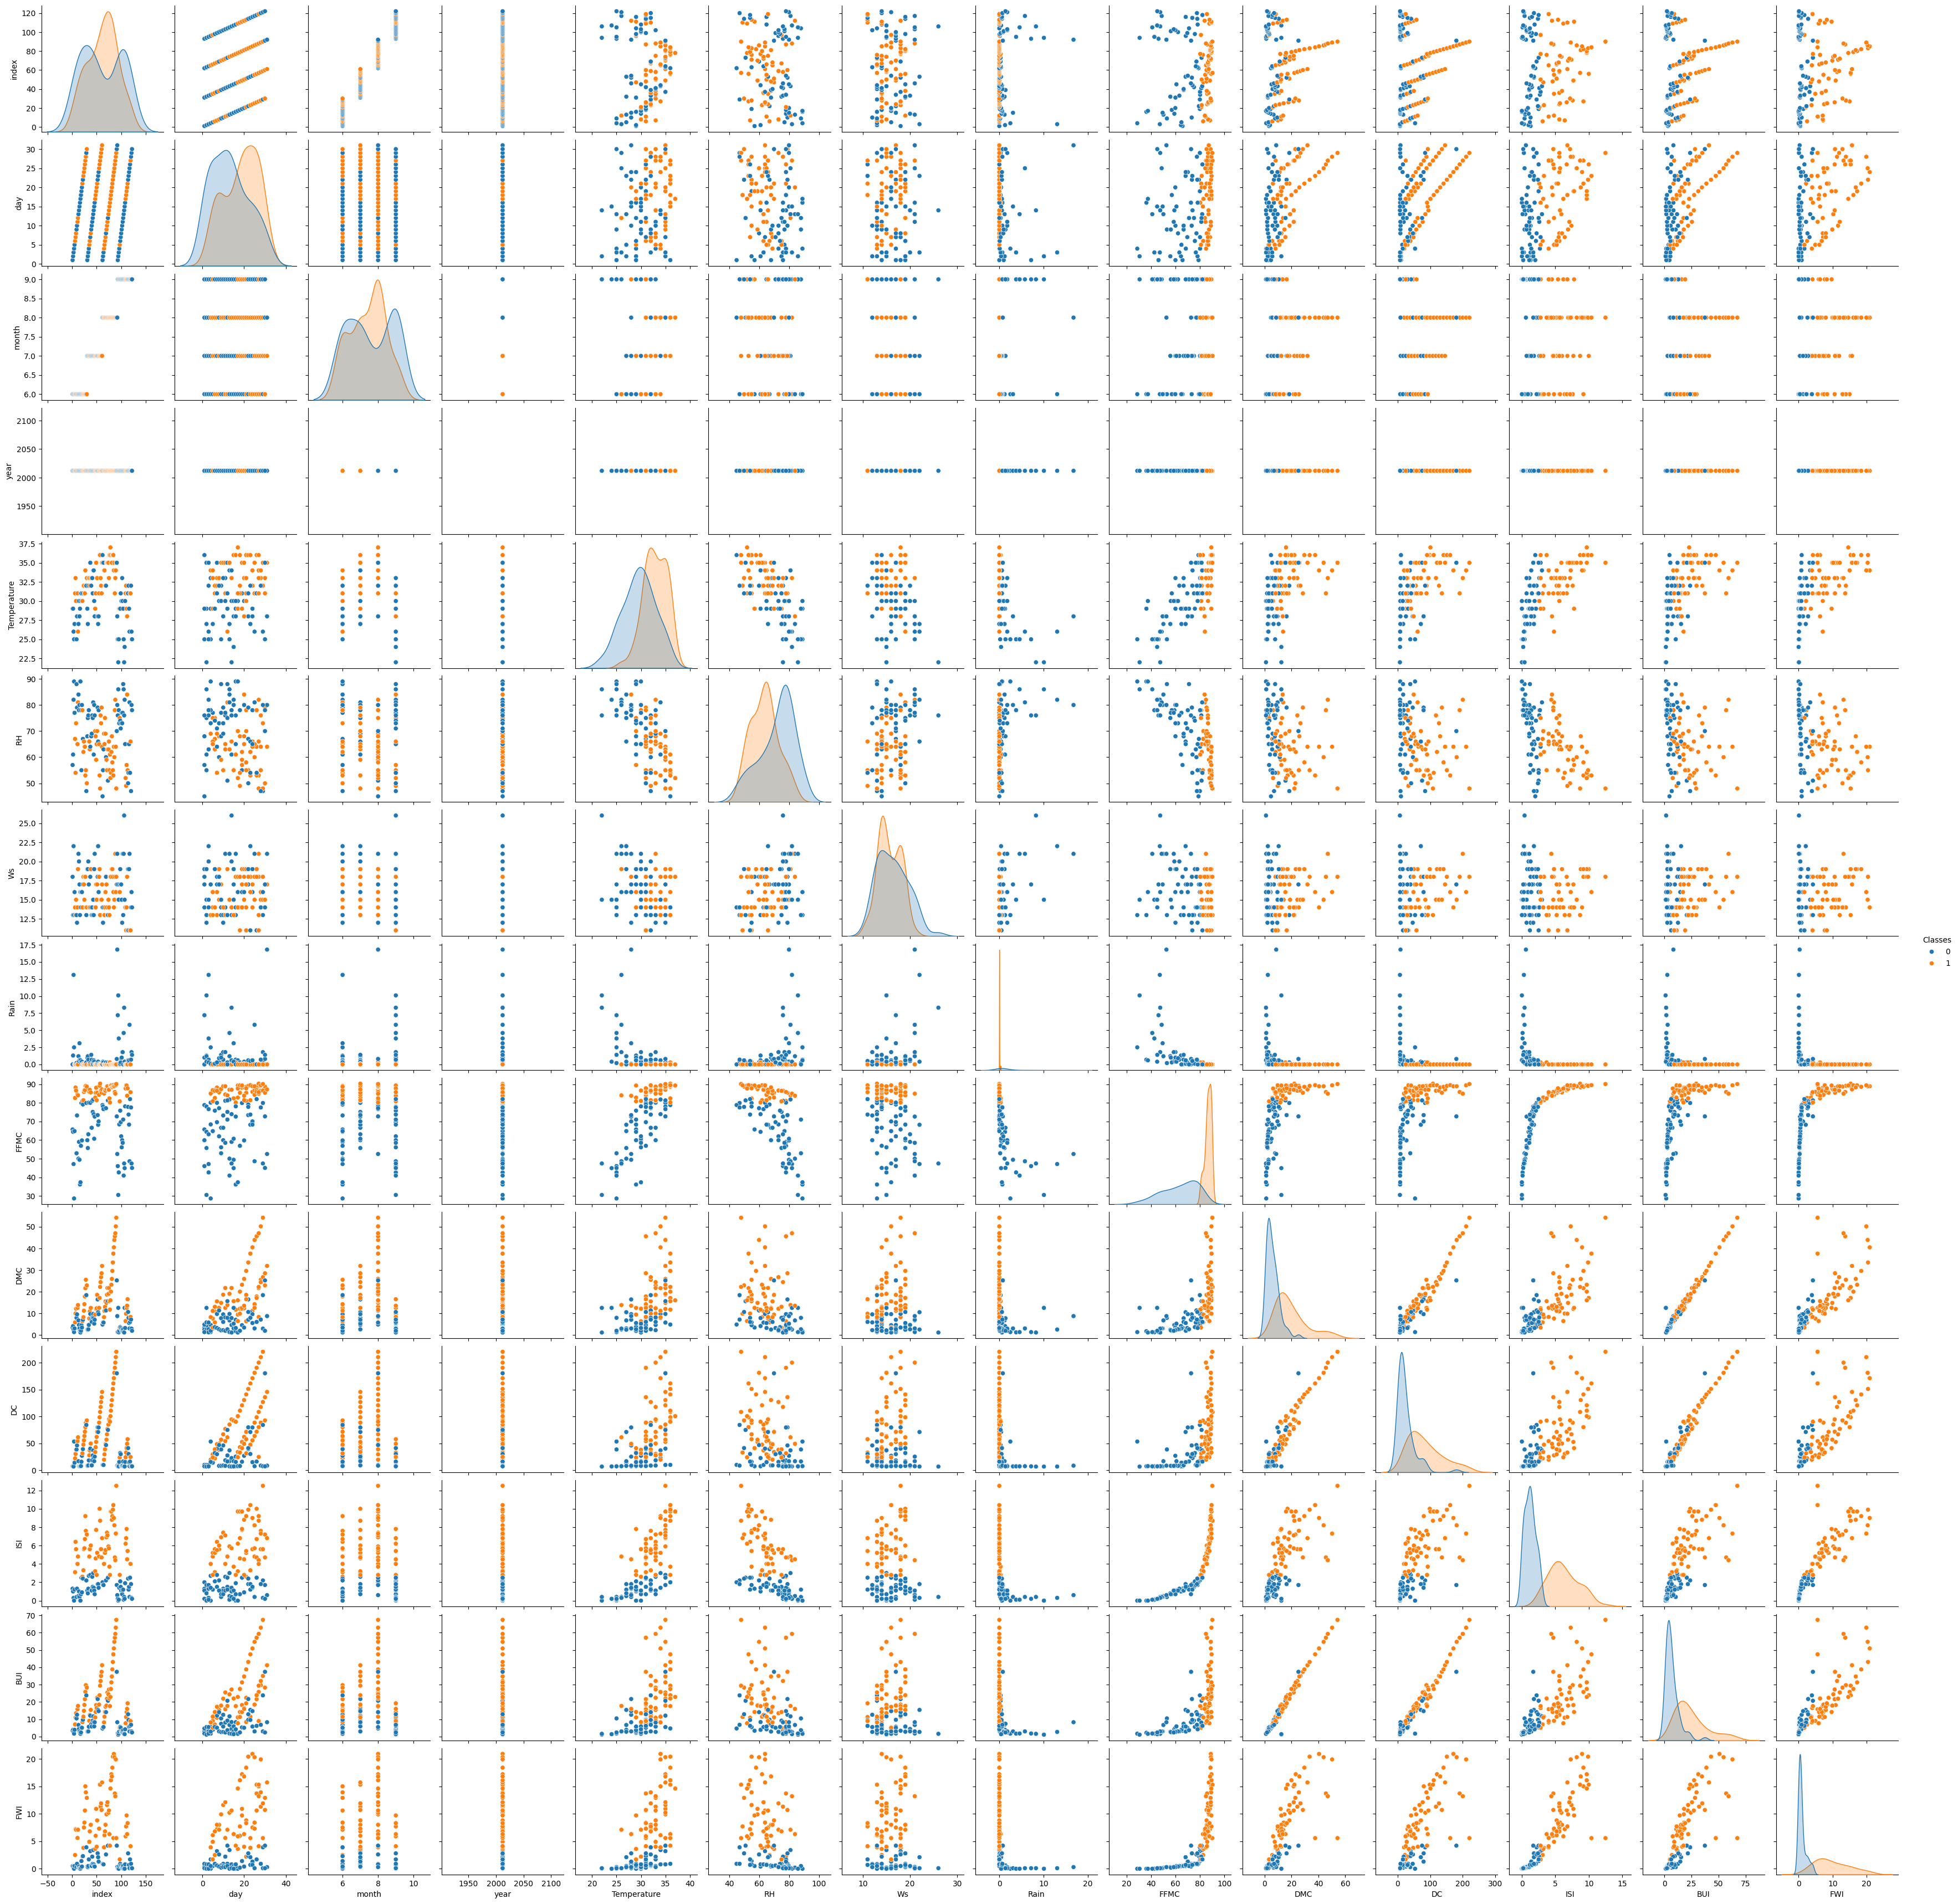

In [146]:
sns.pairplot(df1, hue='Classes')
plt.show()


In [147]:
def clean_temperature(temp):
    return (temp - 32) * 5/9 if temp > 40 else temp


In [148]:
df2['Temperature'] = df2['Temperature'].apply(clean_temperature)


In [149]:
print(df2['Temperature'].head())

125    32.0
126    30.0
127    29.0
128    30.0
129    32.0
Name: Temperature, dtype: float64


count    122.000000
mean       5.238981
std        5.726883
min        0.000000
25%        0.500000
50%        3.000000
75%        8.225000
max       20.900000
Name: FWI, dtype: float64


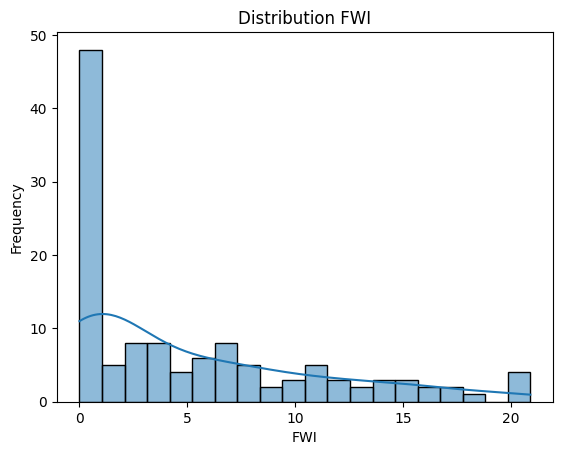

Skewness: 1.0804551644718985


In [150]:
print(df1['FWI'].describe())

sns.histplot(df1['FWI'], bins=20, kde=True)
plt.title('Distribution FWI')
plt.xlabel('FWI')
plt.ylabel('Frequency')
plt.show()

print("Skewness:", df1['FWI'].skew())


count    122.000000
mean       8.435246
std        8.171973
min        0.000000
25%        0.900000
50%        5.950000
75%       13.650000
max       31.100000
Name: FWI, dtype: float64


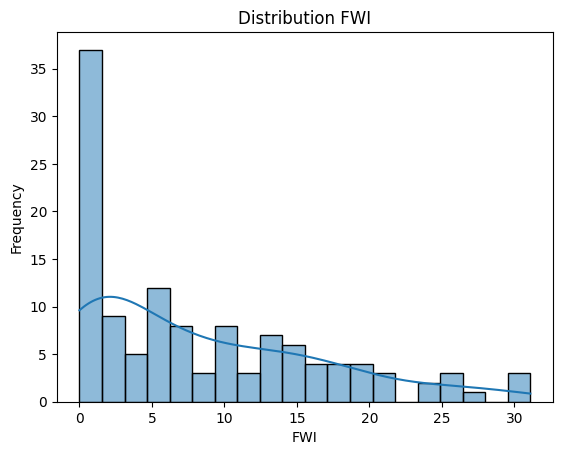

Skewness: 0.9359002703414344


In [151]:
print(df2['FWI'].describe())

sns.histplot(df2['FWI'], bins=20, kde=True)
plt.title('Distribution FWI')
plt.xlabel('FWI')
plt.ylabel('Frequency')
plt.show()

print("Skewness:", df2['FWI'].skew())

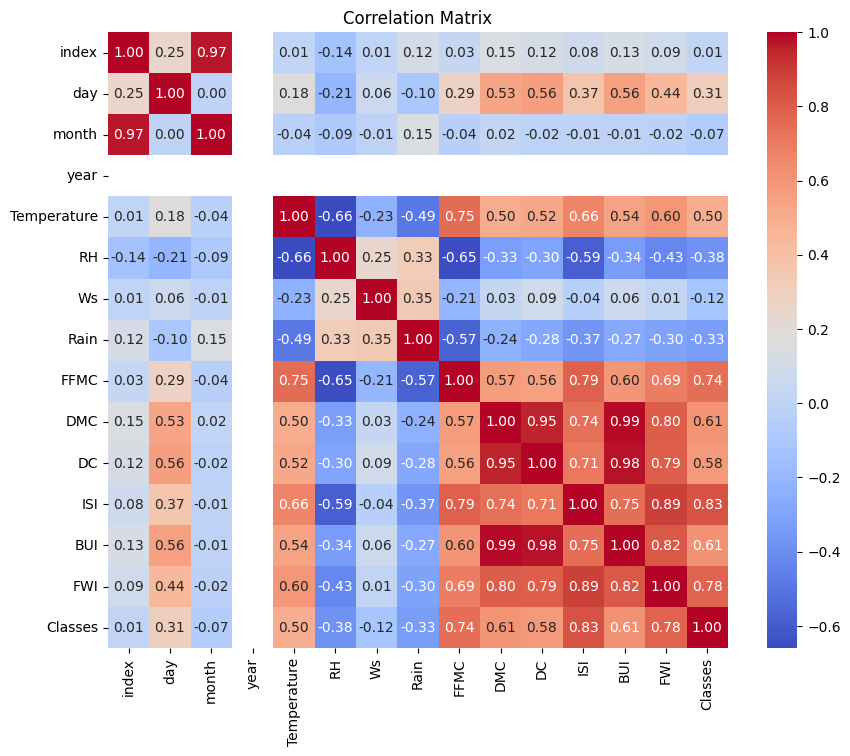

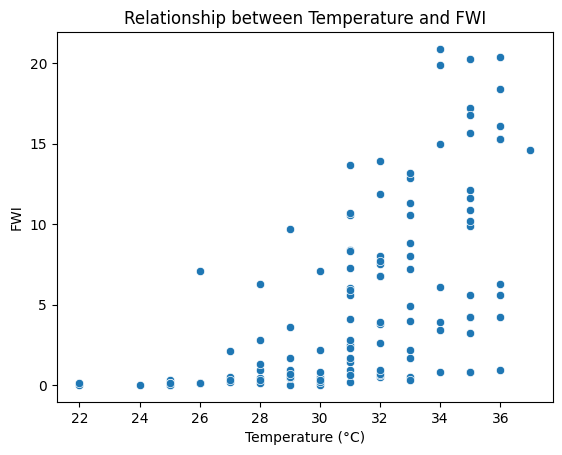

In [152]:
correlation_matrix = df1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

sns.scatterplot(x='Temperature', y='FWI', data=df1)
plt.title('Relationship between Temperature and FWI')
plt.xlabel('Temperature (°C)')
plt.ylabel('FWI')
plt.show()


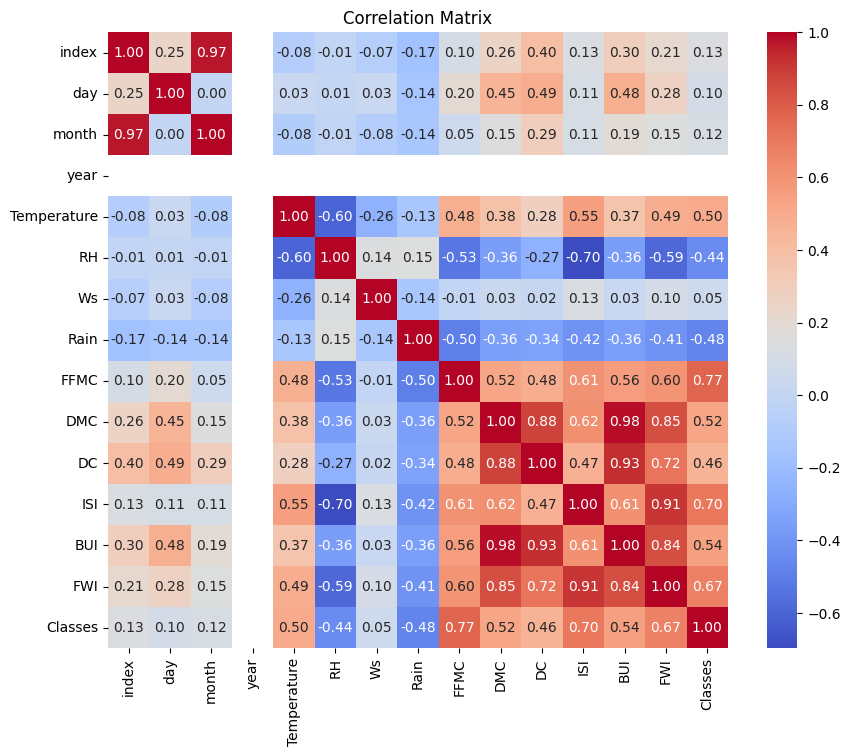

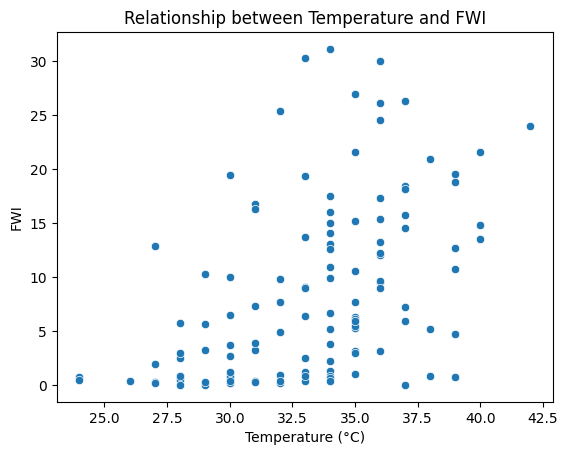

In [153]:
correlation_matrix = df2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

sns.scatterplot(x='Temperature', y='FWI', data=df2)
plt.title('Relationship between Temperature and FWI')
plt.xlabel('Temperature (°C)')
plt.ylabel('FWI')
plt.show()


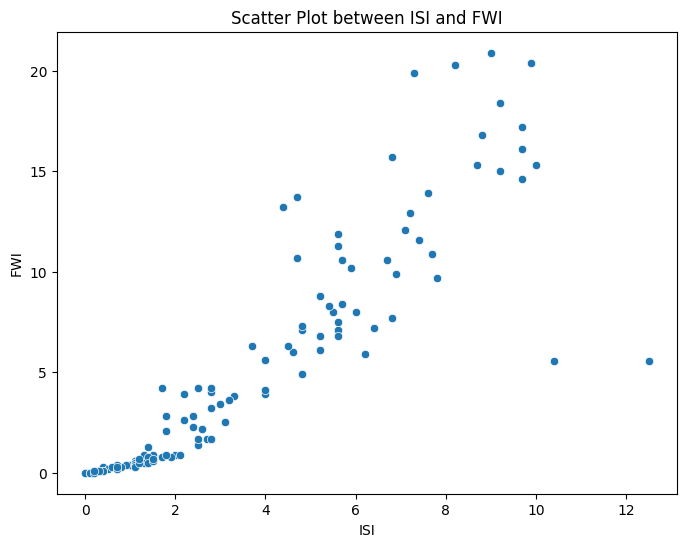

In [154]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df1['ISI'], y=df1['FWI'])

plt.xlabel('ISI')
plt.ylabel('FWI')
plt.title('Scatter Plot between ISI and FWI')
plt.show()


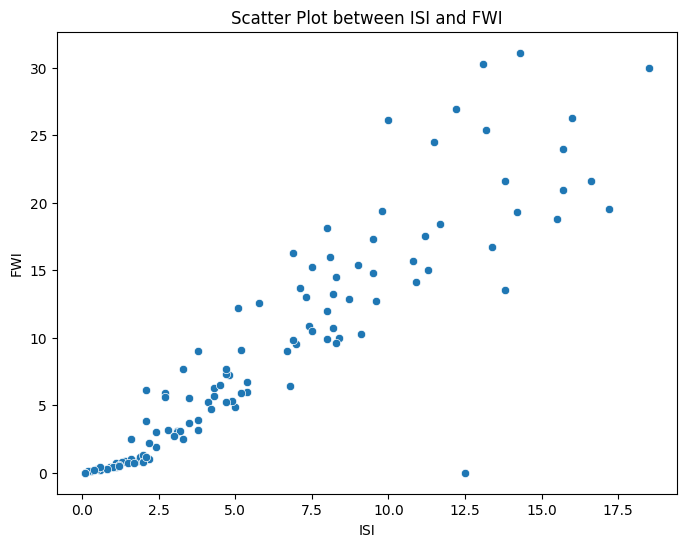

In [155]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df2['ISI'], y=df2['FWI'])

plt.xlabel('ISI')
plt.ylabel('FWI')
plt.title('Scatter Plot between ISI and FWI')
plt.show()


In [156]:
from sklearn.linear_model import LinearRegression

In [158]:
x = df1[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']]
y = df1['FWI']

In [159]:
model = LinearRegression()

In [160]:
model.fit(x,y)

LinearRegression()

In [161]:
model.coef_

array([ 0.07711871,  0.05395989, -0.02892326,  0.09253829,  0.00787456,
        0.0235356 ,  0.02261622,  1.30110725,  0.02717469])

In [162]:
model.intercept_

np.float64(-7.71777175299486)

In [163]:
model.score(x,y)

0.8485413759447025

In [164]:
x = df2[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']]
y = df2['FWI']

In [165]:
model = LinearRegression()

In [166]:
model.fit(x,y)

LinearRegression()

In [167]:
model.coef_

array([-0.08261843,  0.00463907, -0.04238748,  0.07546422, -0.04031664,
       -0.01770265, -0.00911392,  1.18757173,  0.32706403])

In [168]:
model.intercept_

np.float64(2.722142532434084)

In [169]:
model.score(x,y)

0.9656453011622141

In [170]:
from sklearn.linear_model import Lasso

In [171]:
model = Lasso(alpha=1.0)

In [172]:
x = df2[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']]
y = df2['FWI']

In [173]:
model.fit(x,y)

Lasso()

In [174]:
model.coef_

array([-0.        , -0.        ,  0.        ,  0.        , -0.01767166,
        0.02489471,  0.        ,  1.05628132,  0.2601026 ])

In [175]:
model.intercept_

np.float64(-1.3435670224595953)

In [176]:
model.score(x,y)

0.9625722175534088

In [177]:
df1['Region'] = 'Bejaia'
df2['Region'] = 'Sidi Bel-abbes'

dff = pd.concat([df1, df2], ignore_index=True)

X = dff[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'Region']]
y = dff['FWI']

X = pd.get_dummies(X, columns=['Region'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 0.7261103221779256
R² Score: 0.9813703030825268


In [180]:
dff

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.600000,1.3,3.4,0.5,0,Bejaia
1,2,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.600000,1.0,3.9,0.4,0,Bejaia
2,3,3,6,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.100000,0.3,2.7,0.1,0,Bejaia
3,4,4,6,2012,25.0,89.0,13.0,2.5,28.6,1.3,53.542975,0.0,1.7,0.0,0,Bejaia
4,5,5,6,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.200000,1.2,3.9,0.5,0,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,243,26,9,2012,30.0,65.0,14.0,0.0,85.4,16.0,44.500000,4.5,16.9,6.5,1,Sidi Bel-abbes
240,244,27,9,2012,28.0,87.0,15.0,4.4,41.1,6.5,8.000000,0.1,6.2,0.0,0,Sidi Bel-abbes
241,245,28,9,2012,27.0,87.0,29.0,0.5,45.9,3.5,7.900000,0.4,3.4,0.2,0,Sidi Bel-abbes
242,246,29,9,2012,24.0,54.0,18.0,0.1,79.7,4.3,15.200000,1.7,5.1,0.7,0,Sidi Bel-abbes
